In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import PercentFormatter

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
DIRECTORY = "ingo"

all_files = glob.glob(os.path.join(DIRECTORY, '**', '*queue.csv'), recursive=True)
all_files.sort()
all_files = [filename.replace("\\", "/") for filename in all_files]

experiments = {}
experiments['colight'] = {}
experiments['dqn'] = {}
experiments['mplight'] = {}
experiments['fixedtime'] = {}
experiments['maxpressure'] = {}

for filename in all_files:
    model_name = filename.split("/")[1]
    experiment_name = filename.split("/")[-1].rstrip(".csv")
    df = pd.read_csv(filename)
    df = df[df["queueing_length"] > 0].groupby(['timestep']).agg({"queueing_length": "mean"}).round(2).reset_index()
    
    df['interval'] = (df['timestep'] // 3600).astype(int)

    # Group by the interval and calculate the mean queueing length
    result = df.groupby('interval')['queueing_length'].mean().reset_index()

    # Convert interval back to actual time in seconds for better understanding
    result['timestep'] = result['interval'] * 1
    
    result = result.drop(columns='interval')
    
    df = result
    
    experiments[model_name][experiment_name] = df


In [3]:
experiments['dqn'].keys()

dict_keys(['ingo_combined_queue', 'ingo_combined_sensor_queue', 'ingo_evening_queue', 'ingo_morning_queue', 'ingo_noon_queue', 'ingo_sensor_queue'])

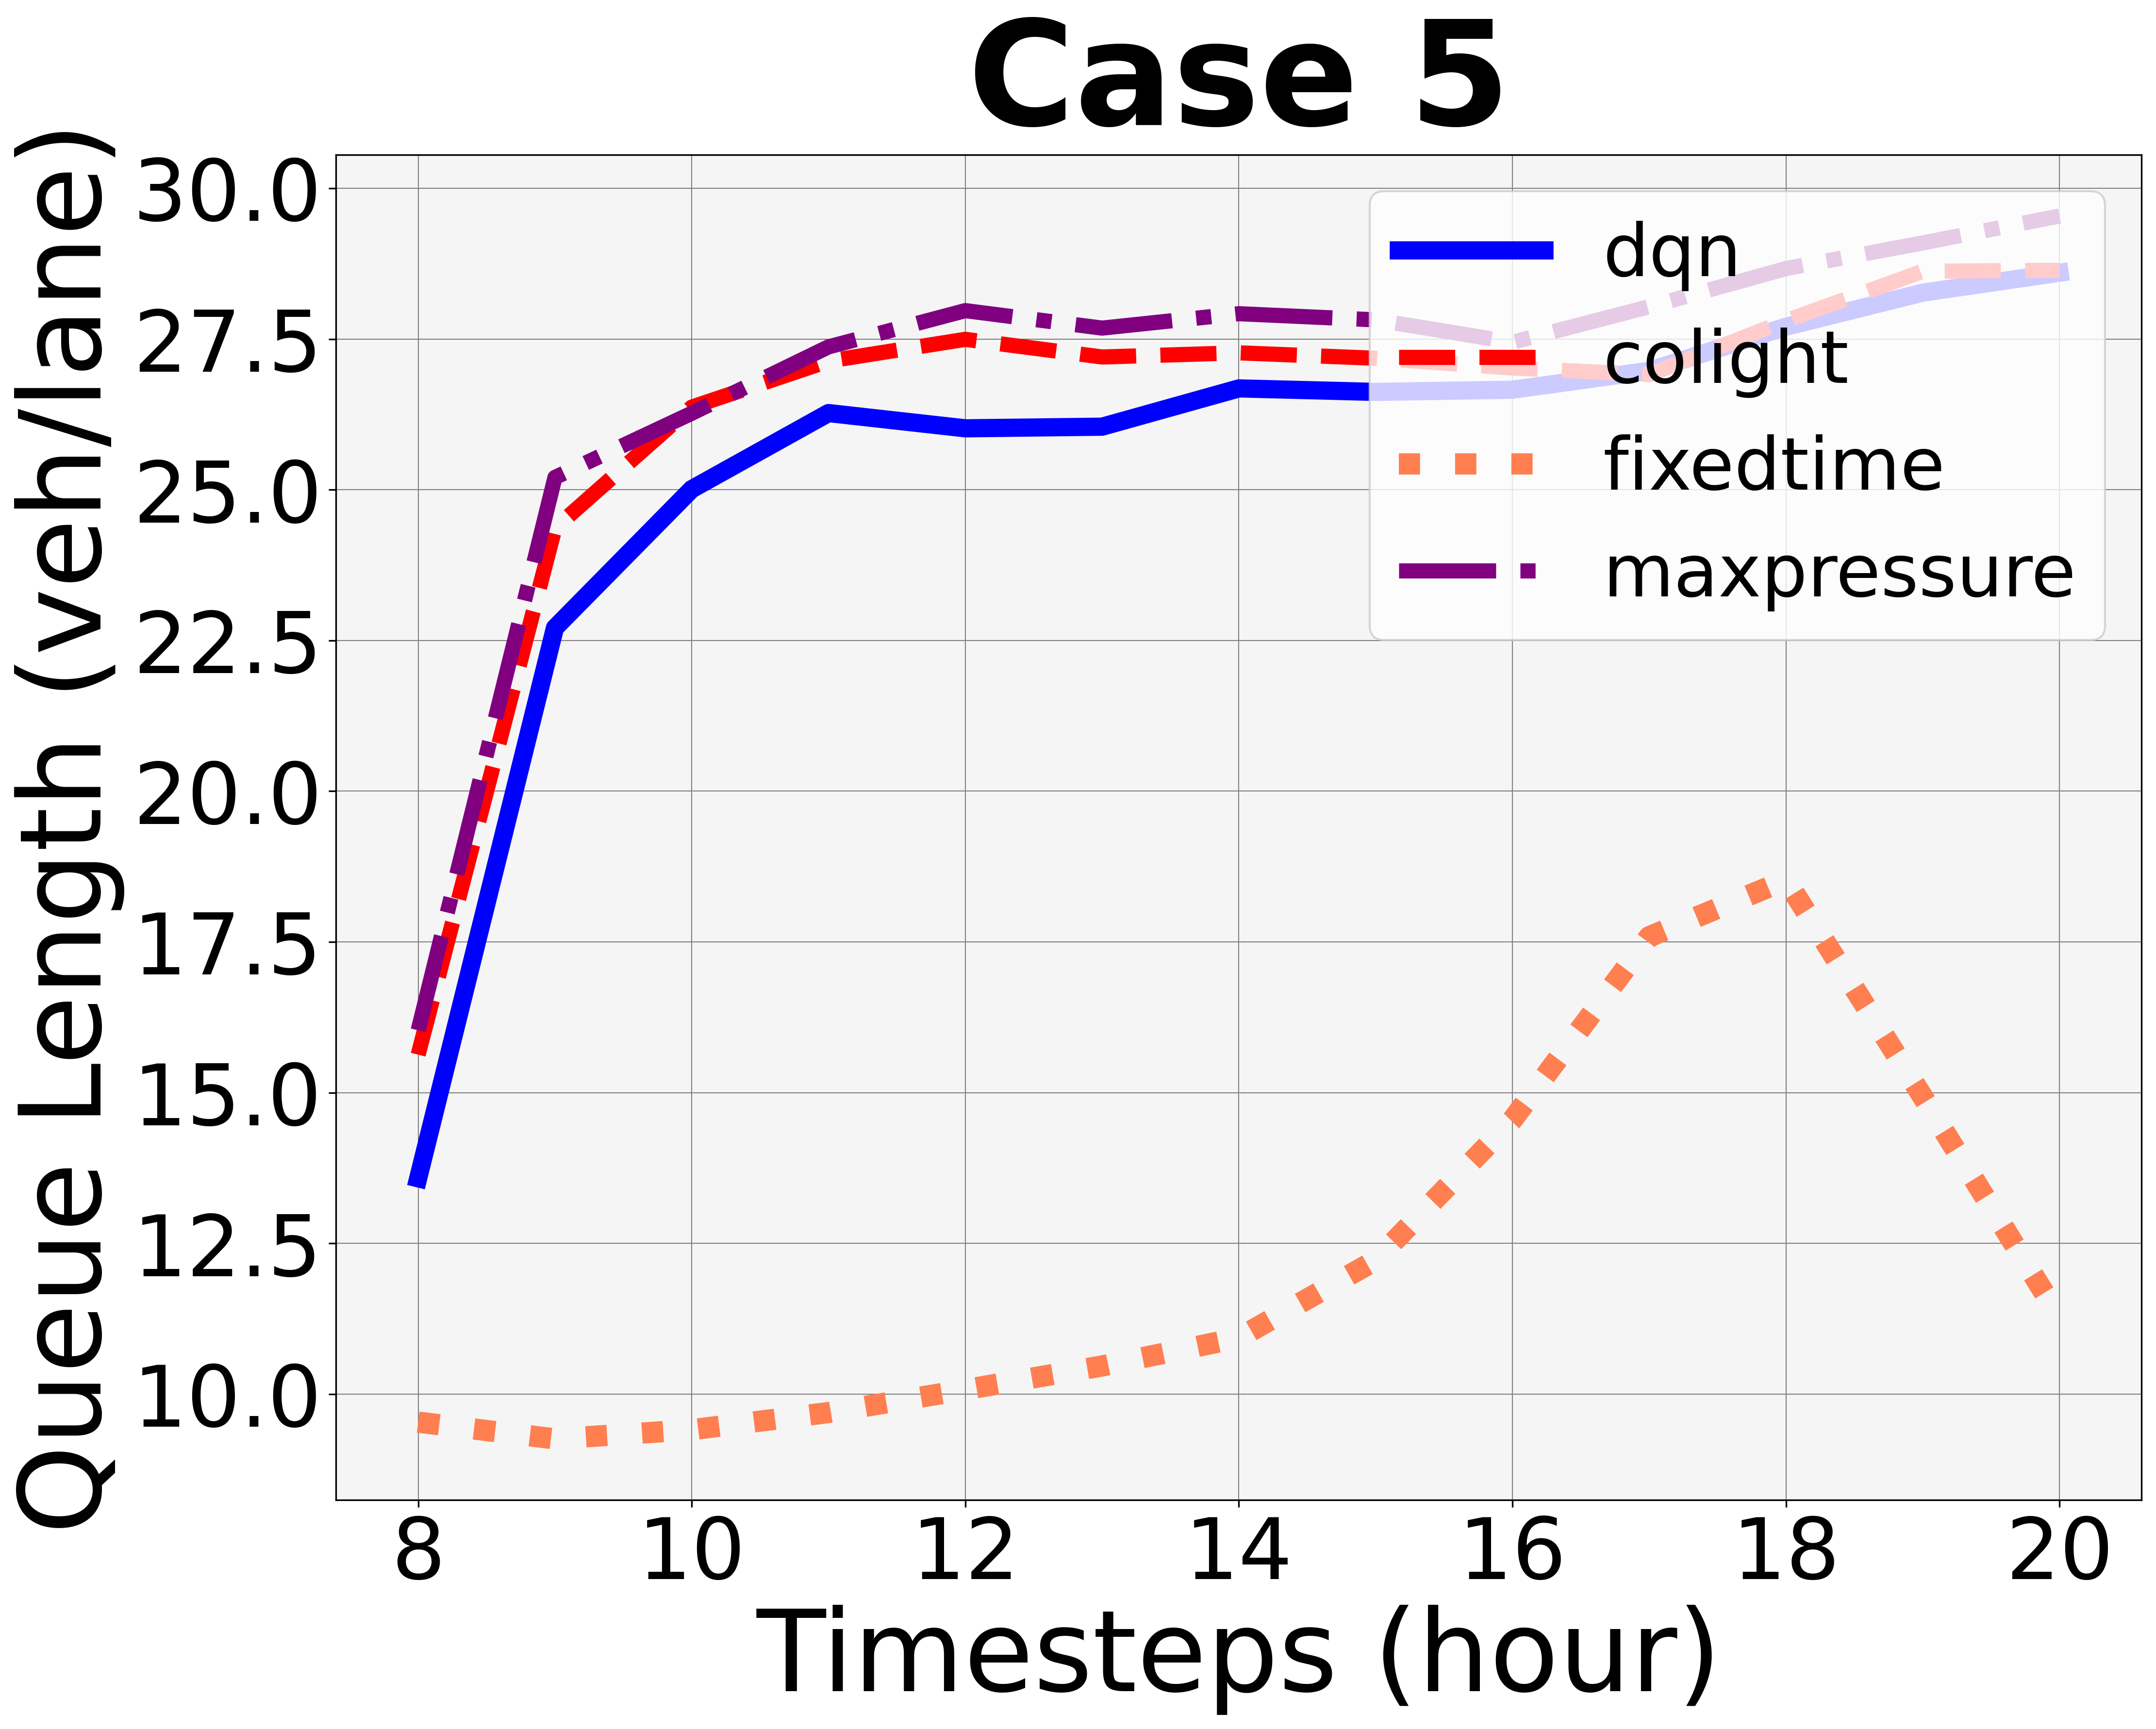

In [4]:
case_name = "ingo_combined_queue"
case_title = "Case 5"
# experiment_name = "combined_queue"

dqn_df = experiments['dqn'][case_name]
# dqn_df2 = experiments['colight']["combined_sensor_queue"]
colight_df = experiments['colight'][case_name]
fixedtime_df = experiments['fixedtime'][case_name]
max_df = experiments['maxpressure'][case_name]

plt.figure(figsize=(16, 12))
plt.plot(dqn_df["timestep"], dqn_df["queueing_length"], label='dqn', color='blue', linestyle='-', linewidth=9)
# plt.plot(dqn_df2['timestep'], dqn_df2['queueing_length'], label='dqn sensor', color='red', linestyle='--', linewidth=2.5)
plt.plot(colight_df['timestep'], colight_df['queueing_length'], label='colight', color='red', linestyle='--', linewidth=7.5)
plt.plot(fixedtime_df["timestep"], fixedtime_df["queueing_length"], label='fixedtime', color='coral', linestyle=':', linewidth=10.5)
plt.plot(max_df["timestep"], max_df["queueing_length"], label='maxpressure', color='purple', linestyle='-.', linewidth=7.5)


plt.title(case_title, fontweight='bold', fontsize=72)
plt.xlabel("Timesteps (hour)", fontsize=56)
plt.ylabel('Queue Length (veh/lane)', fontsize=56)
plt.legend(loc='upper right', fontsize=36)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(range(8,21,1*2), fontsize=42)
plt.yticks(fontsize=42)
plt.gca().set_facecolor('whitesmoke')

plt.show()

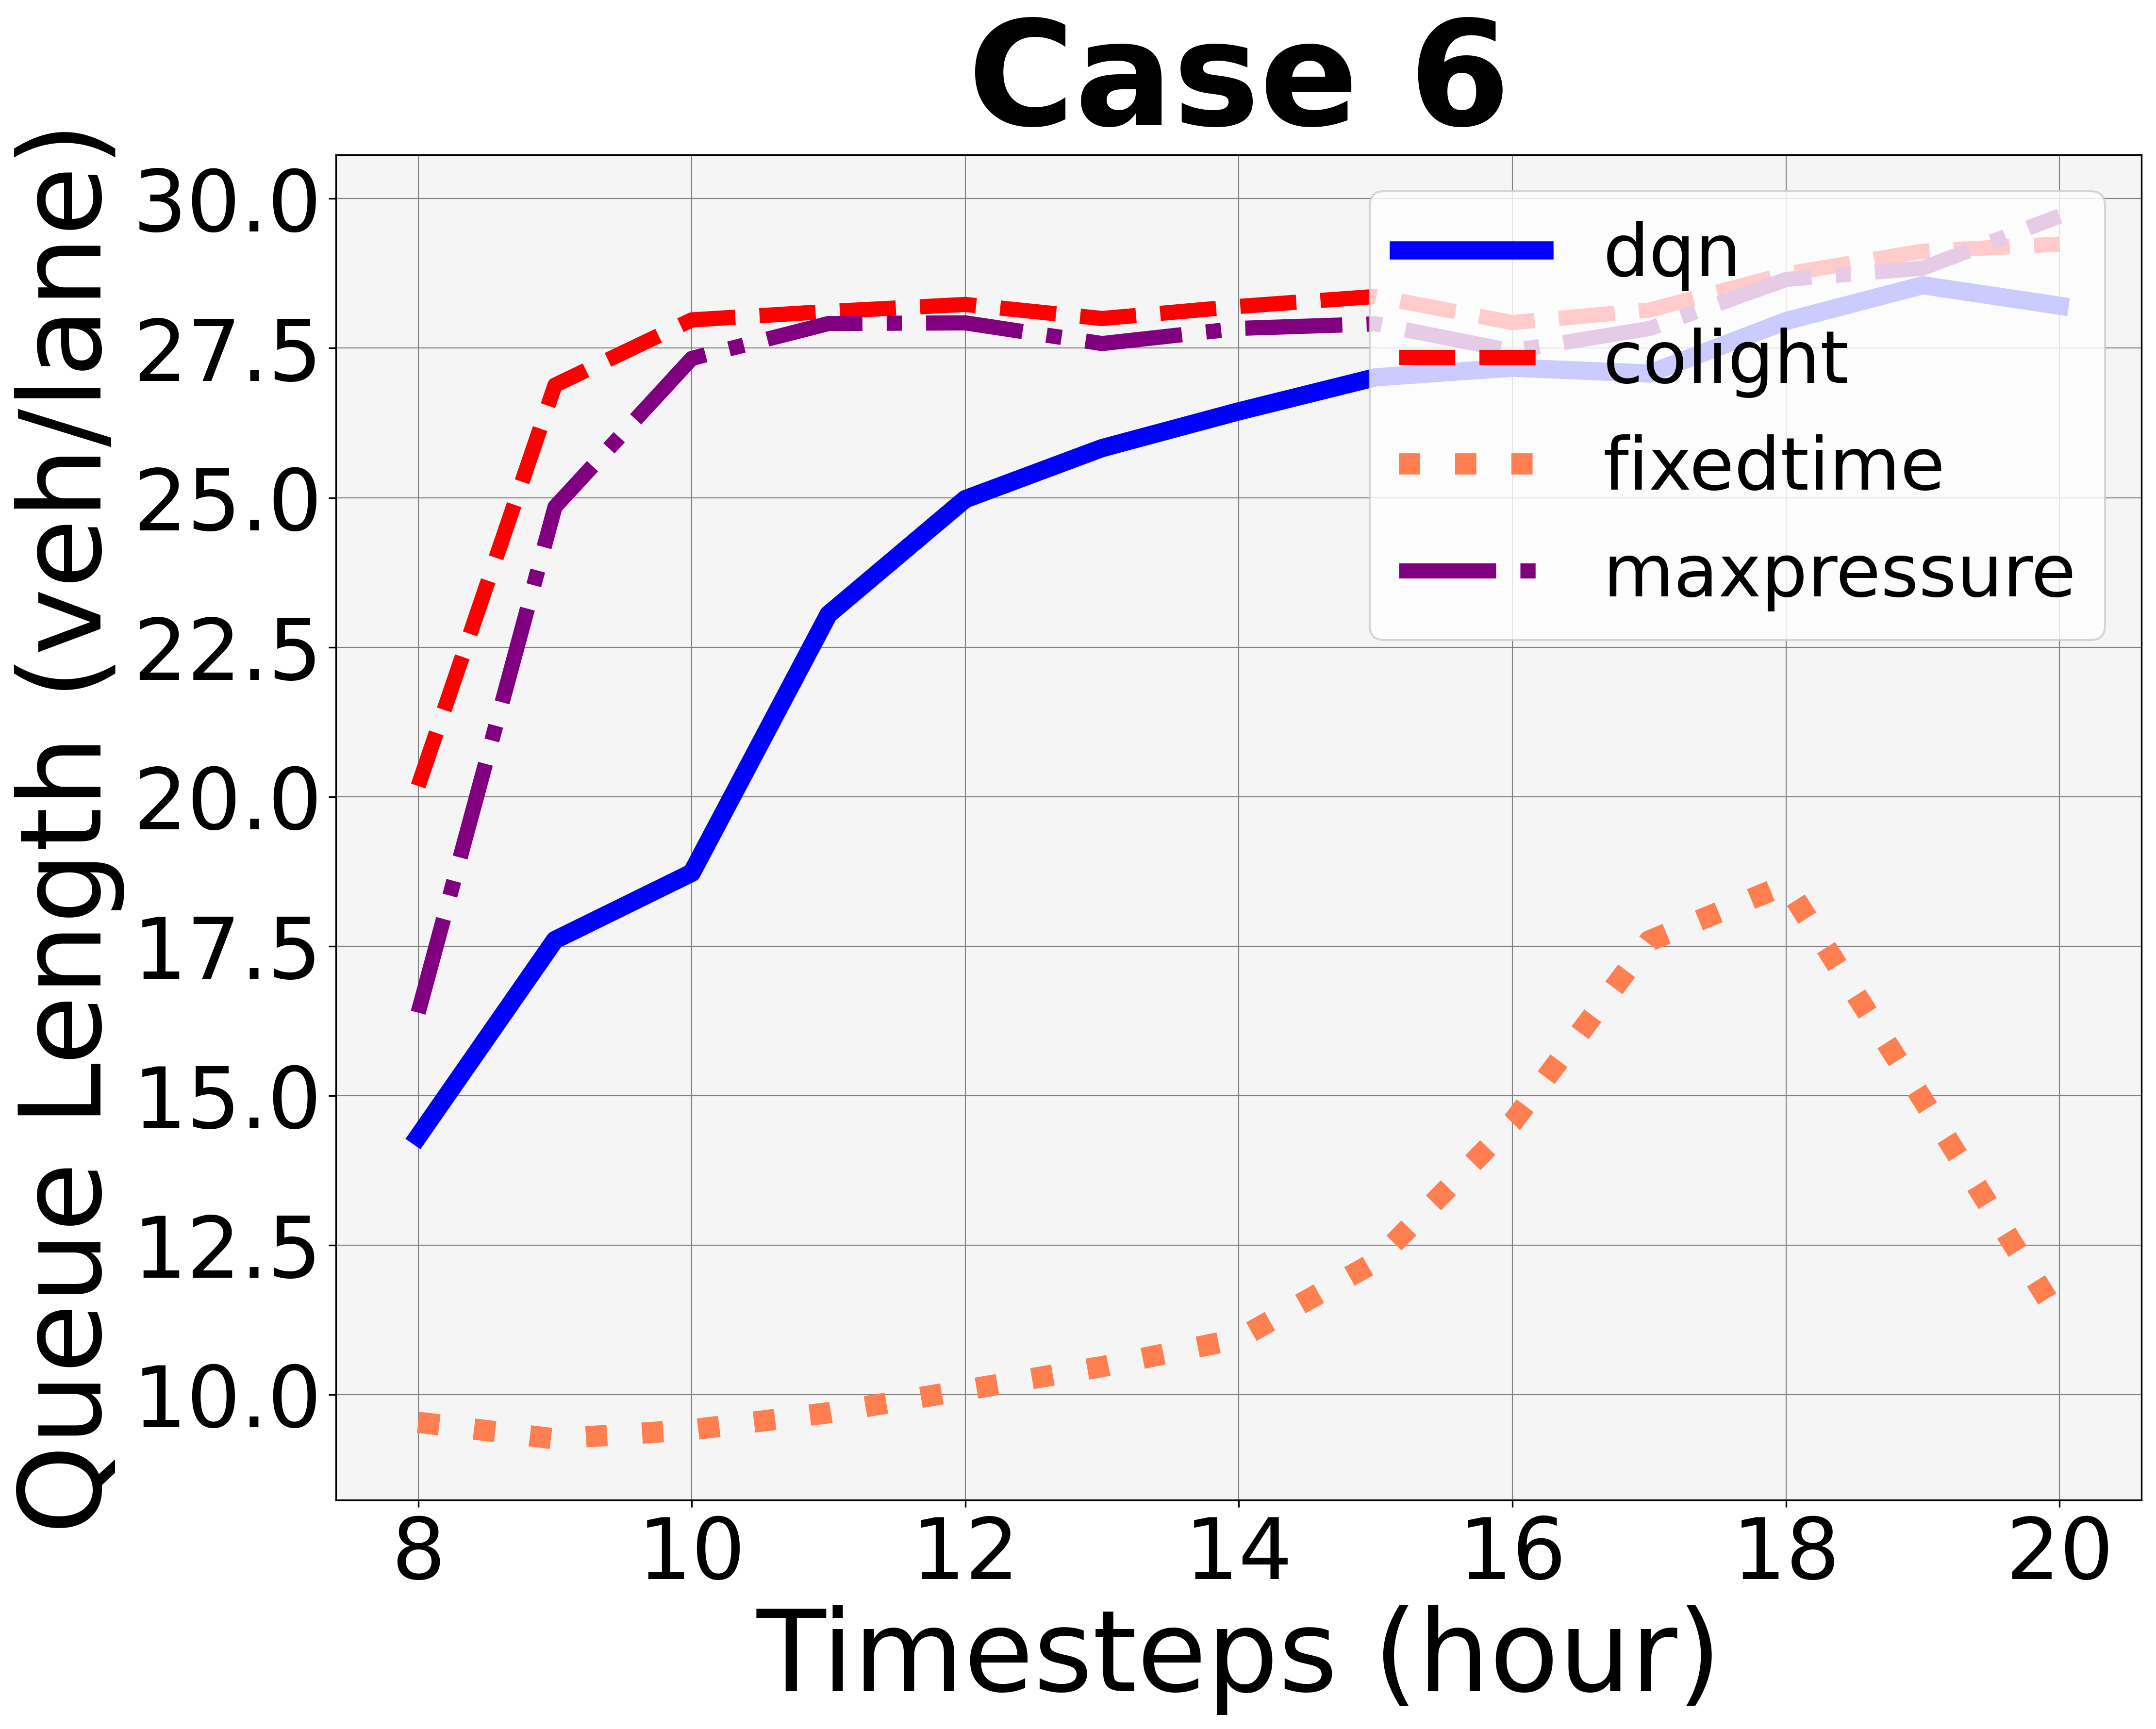

In [5]:
case_name = "ingo_combined_sensor_queue"
case_title = "Case 6"

dqn_df = experiments['dqn'][case_name]
colight_df = experiments['colight'][case_name]
fixedtime_df = experiments['fixedtime']["ingo_combined_queue"]
max_df = experiments['maxpressure'][case_name]

plt.figure(figsize=(16, 12))
plt.plot(dqn_df["timestep"], dqn_df["queueing_length"], label='dqn', color='blue', linestyle='-', linewidth=9)
plt.plot(colight_df['timestep'], colight_df['queueing_length'], label='colight', color='red', linestyle='--', linewidth=7.5)
plt.plot(fixedtime_df["timestep"], fixedtime_df["queueing_length"], label='fixedtime', color='coral', linestyle=':', linewidth=10.5)
plt.plot(max_df["timestep"], max_df["queueing_length"], label='maxpressure', color='purple', linestyle='-.', linewidth=7.5)

plt.title(case_title, fontweight='bold', fontsize=72)
plt.xlabel("Timesteps (hour)", fontsize=56)
plt.ylabel('Queue Length (veh/lane)', fontsize=56)
plt.legend(loc='upper right', fontsize=36)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(range(8,21,1*2), fontsize=42)
plt.yticks(fontsize=42)
plt.gca().set_facecolor('whitesmoke')

plt.show()